In [96]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from scipy.stats import gaussian_kde

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

from scipy.stats import gaussian_kde
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Input




In [97]:
df=pd.read_csv("D:/pred/assgn+lec/a2/data.csv", encoding="latin1")
x=df["no2"].dropna().values
print(x)





[17.4  7.  28.5 ... 45.  50.  46. ]


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_17476\760803282.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("D:/pred/assgn+lec/a2/data.csv", encoding="latin1")


In [ ]:
roll_no=102313060
a=0.5*(roll_no%7)
b=0.3*((roll_no%5)+1)

z=x+ a* np.sin(b * x)
z=(z - z.mean()) / z.std()
print(z)


[-0.52149498 -0.94187538  0.20995833 ...  1.10281563  1.36006842
  1.1680688 ]


In [ ]:
#gan
generator=Sequential([
    Input(shape=(1,)),
    Dense(32),
    LeakyReLU(0.2),
    Dense(32),
    LeakyReLU(0.2),
    Dense(1)
])

discriminator=Sequential([
    Input(shape=(1,)),
    Dense(16),
    LeakyReLU(0.2),
    Dense(16),
    LeakyReLU(0.2),
    Dense(1, activation="sigmoid")
])


In [100]:

discriminator.trainable = True

discriminator.compile(optimizer=Adam(0.0002),loss='binary_crossentropy',metrics=['accuracy'])
discriminator.trainable=False

gan=tf.keras.Sequential([generator,discriminator])
gan.compile(optimizer=Adam(0.0002),loss='binary_crossentropy')


In [101]:
epochs=3000
batch_size=64
for epoch in range(epochs):
    discriminator.trainable = True
    #discriminator training
    id=np.random.randint(0,z.shape[0],batch_size)
    real_z=z[id]

    noise=np.random.normal(0, 1, (batch_size,1))
    fake_z=generator.predict(noise,verbose=0)

    real=np.ones((batch_size,1))
    fake=np.zeros((batch_size,1))

    loss_r=discriminator.train_on_batch(real_z,real)
    loss_f=discriminator.train_on_batch(fake_z,fake)

    #generator training
    discriminator.trainable = False
    noise = np.random.normal(0, 1, (batch_size, 1))
    loss_g=gan.train_on_batch(noise,real)

    if epoch%500==0:
        print(f"epoch:{epoch},d_loss_real:{loss_r}, d_loss_fake:{loss_f}, g_loss:{loss_g}")
        


epoch:0,d_loss_real:[array(0.6461128, dtype=float32), array(1., dtype=float32)], d_loss_fake:[array(0.6710383, dtype=float32), array(0.5, dtype=float32)], g_loss:0.6901830434799194
epoch:500,d_loss_real:[array(0.664016, dtype=float32), array(0.5966221, dtype=float32)], d_loss_fake:[array(0.66413313, dtype=float32), array(0.596167, dtype=float32)], g_loss:0.7232300043106079
epoch:1000,d_loss_real:[array(0.6720318, dtype=float32), array(0.56599826, dtype=float32)], d_loss_fake:[array(0.6722484, dtype=float32), array(0.56571555, dtype=float32)], g_loss:0.6925493478775024
epoch:1500,d_loss_real:[array(0.6793314, dtype=float32), array(0.53846633, dtype=float32)], d_loss_fake:[array(0.679339, dtype=float32), array(0.5384327, dtype=float32)], g_loss:0.7237508893013
epoch:2000,d_loss_real:[array(0.67665464, dtype=float32), array(0.54867923, dtype=float32)], d_loss_fake:[array(0.6766126, dtype=float32), array(0.548792, dtype=float32)], g_loss:0.7155205607414246
epoch:2500,d_loss_real:[array(0.6

In [102]:
#generate samples
noise=np.random.normal(0, 1, (10000, 1))
z_fake=generator.predict(noise)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


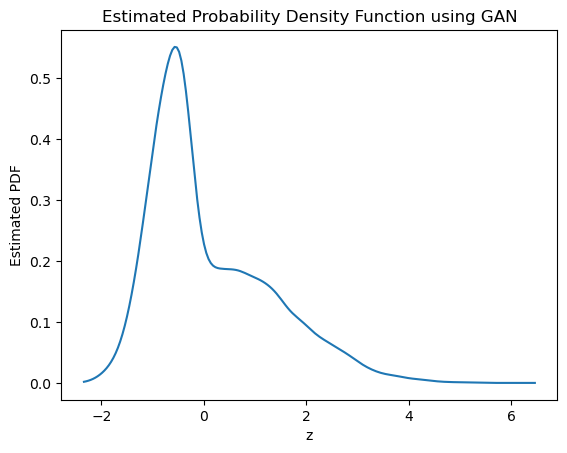

In [105]:

kde= gaussian_kde(z_fake.flatten())
x_axis = np.linspace(z_fake.min(), z_fake.max(), 200)

plt.plot(x_axis, kde(x_axis))
plt.xlabel("z")
plt.ylabel("Estimated PDF")
plt.title("Estimated Probability Density Function using GAN")
plt.show()


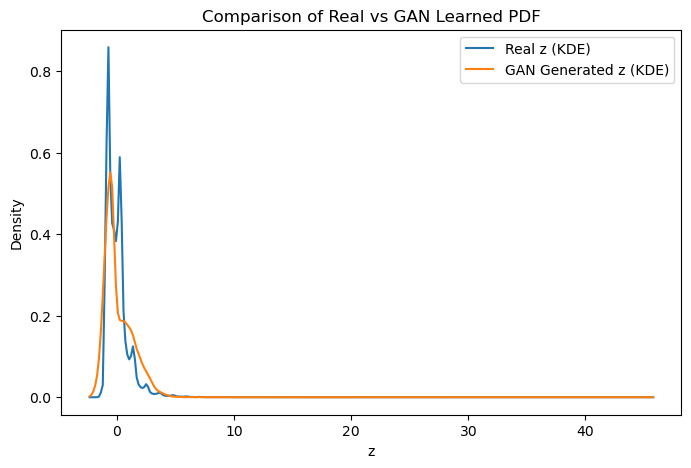

In [106]:

kde_real=gaussian_kde(z)
x_axis=np.linspace(min(z.min(), z_fake.min()),
                     max(z.max(), z_fake.max()), 300)

pdf_real=kde_real(x_axis)

# KDE for fake z
kde_fake=gaussian_kde(z_fake.flatten())
pdf_fake=kde_fake(x_axis)

plt.figure(figsize=(8,5))
plt.plot(x_axis, pdf_real, label="Real z (KDE)")
plt.plot(x_axis, pdf_fake, label="GAN Generated z (KDE)")
plt.xlabel("z")
plt.ylabel("Density")
plt.title("Comparison of Real vs GAN Learned PDF")
plt.legend()
plt.show()